In [45]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
def parse_research_url(url):
    """
    Function to parse the url and collect citations and h-index from a Pure URL
    """
    html_text = requests.get(url).text
    soup = BeautifulSoup(html_text, "html.parser")


    metrics = list()

    for tab in soup.find_all("div", class_="metrics-hindices"):
        for metric in tab.find_all("ul", class_="metrics-list"):
            metrics = [x.get_text() for x in metric.find_all("div", class_="value")]

    return metrics


In [39]:
# Read the list with the URLs
# This list was obtained from the UNAB pure website, selecting all researchers from Facultad Ciencias de la Vida
citations_values = []
h_index_values = []

with open("res_urls.txt") as input_file:
    urls = [line.rstrip() for line in input_file]

    for url in urls:
        try:
            citation, h_index = parse_research_url(url)
        except ValueError: # Some profiles are empty
            continue
        citations_values.append(int(citation))
        h_index_values.append(int(h_index))

In [40]:
# Create dataframe
df = pd.DataFrame(data = {"citations": citations_values,
                  "h_index" : h_index_values}
)
df

,citations,h_index
0,105,5
1,220,5
2,1140,21
3,844,12
4,11,2
...,...,...
79,192,7
80,1435,19
81,772,16
82,309,9


In [41]:
# Calculate quartiles for citations
df["citations"].quantile([0.25, 0.5, 0.75])

0.25     409.25
0.50     817.00
0.75    1495.75
Name: citations, dtype: float64

In [42]:
# Calculate quartiles for h_index
df["h_index"].quantile([0.25, 0.5, 0.75])

0.25    10.0
0.50    16.0
0.75    21.0
Name: h_index, dtype: float64

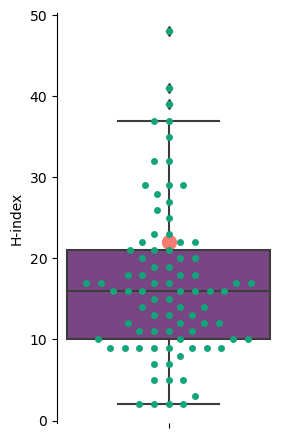

In [92]:
# Boxplot of h_index
plt.figure(figsize = (3,4.5))

ax = sns.boxplot( y="h_index", data=df, color="#7F3C8D")
ax = sns.swarmplot(y="h_index", data = df, color="#11A579", marker=".", size=10)
ax.plot(0,22, marker="o", markersize=10, color="#f97b72")

ax.set_ylabel("H-index")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)


plt.tight_layout()
plt.savefig("hindex.png", dpi=300,)
plt.show()
#7F3C8D,#11A579,#3969AC,#F2B701,#E73F74,#80BA5A,#E68310,#008695,#CF1C90,#f97b72,#4b4b8f,#A5AA99

/Users/jugalde/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jugalde/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


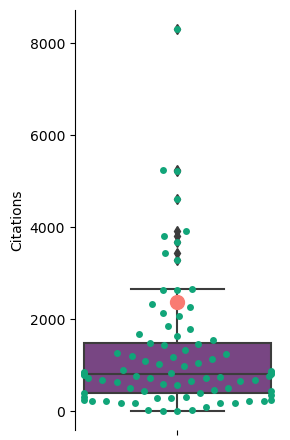

In [93]:
# Boxplot of citations
plt.figure(figsize = (3,4.5))

ax = sns.boxplot( y="citations", data=df, color="#7F3C8D")
ax = sns.swarmplot(y="citations", data = df, color="#11A579", marker=".", size=10)
ax.plot(0,2378, marker="o", markersize=10, color="#f97b72")

ax.set_ylabel("Citations")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)


plt.tight_layout()
plt.savefig("citations.png", dpi=300,)
plt.show()